#**LOADING DATASET**

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
!pip install pandas openpyxl

In [3]:
# import dataset
df = pd.read_excel('/content/wfp_food_prices_ind_FIX.xlsx')
df.head(5)


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1994-01-15,Delhi,Delhi,Delhi,28666667.0,77216667.0,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.2545
1,1994-01-15,Delhi,Delhi,Delhi,28666667.0,77216667.0,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1590
2,1994-01-15,Delhi,Delhi,Delhi,28666667.0,77216667.0,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4294
3,1994-01-15,Delhi,Delhi,Delhi,28666667.0,77216667.0,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.9860
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23033333.0,72616667.0,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2163


In [4]:
df.shape

(172017, 14)

In [6]:
# Memastikan Data Tidak ada yang Kosong
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172017 entries, 0 to 172016
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       172017 non-null  datetime64[ns]
 1   admin1     171228 non-null  object        
 2   admin2     171228 non-null  object        
 3   market     172017 non-null  object        
 4   latitude   171228 non-null  float64       
 5   longitude  171228 non-null  float64       
 6   category   172017 non-null  object        
 7   commodity  172017 non-null  object        
 8   unit       172017 non-null  object        
 9   priceflag  172017 non-null  object        
 10  pricetype  172017 non-null  object        
 11  currency   172017 non-null  object        
 12  price      172017 non-null  float64       
 13  usdprice   172017 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage: 18.4+ MB


#**ANALISIS**

In [13]:
# Mengambil kolom numerik
numerical_columns = df[['price', 'usdprice']]  # Ganti dengan kolom numerik lain yang ada

# Menghitung statistik deskriptif
stats = numerical_columns.describe()

# Menggunakan Styler untuk menampilkan tabel dengan gaya
styled_stats = stats.style.format("{:.2f}") \
    .set_caption("Statistik Deskriptif") \
    .set_table_attributes('style="width: 50%; margin: auto;"') \
    .set_properties(**{'text-align': 'center'})

# Menampilkan tabel yang telah distyling
styled_stats

,price,usdprice
count,172017.00,172017.00
mean,94.22,10734.63
std,237.14,39307.77
min,2.50,0.06
25%,26.00,0.40
50%,48.67,0.72
75%,101.30,13895.00
max,4910.00,887788.00


Melakukan analisis statistik deskriptif pada dua kolom numerik yaitu 'price' dan 'usdprice' dari sebuah DataFrame, dengan menggunakan fungsi describe() yang menghasilkan ringkasan statistik berupa jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil pertama (25%), median (50%), kuartil ketiga (75%), dan nilai maksimum (max) - dimana hasilnya menunjukkan bahwa terdapat 172017 data untuk kedua kolom, dengan rata-rata price 94.22 dan usdprice 10734.63, serta rentang nilai price dari 2.50 hingga 4910.00 dan usdprice dari 0.06 hingga 887788.00, yang kemudian ditampilkan dalam bentuk tabel yang diformat rapi menggunakan styler dengan lebar 50% dan alignment teks di tengah.

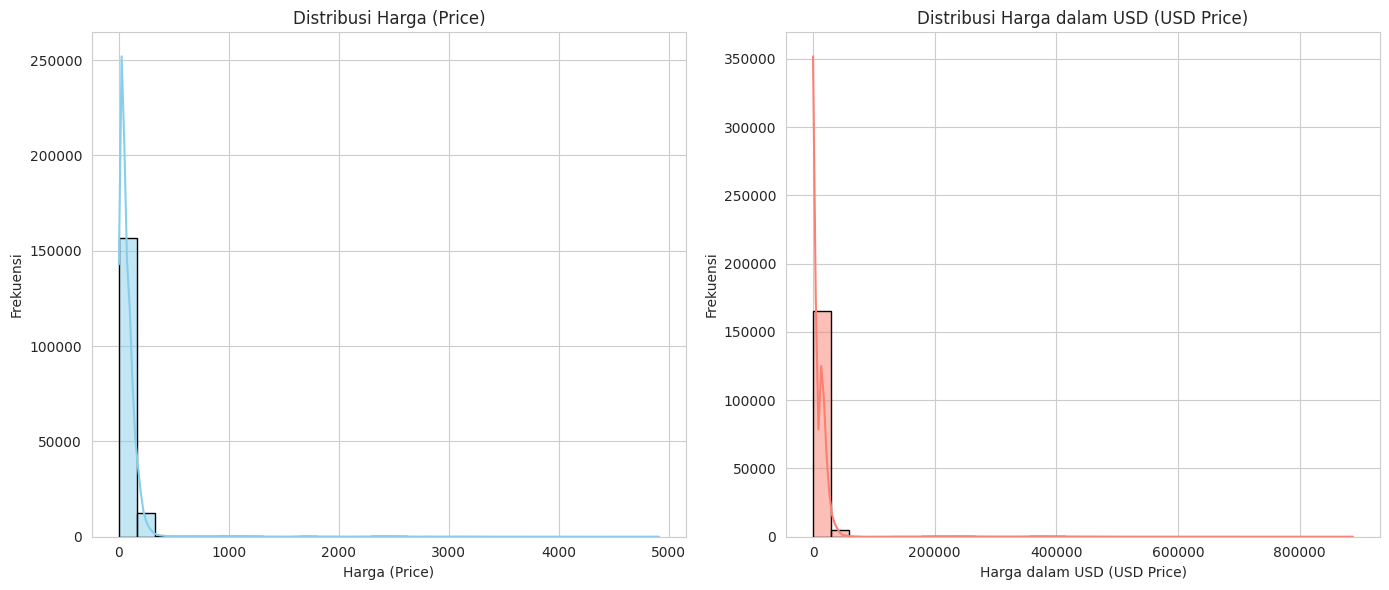

In [10]:
# Menampilkan statistik deskriptif untuk kolom numerik dengan format yang lebih rapi
ringkasan_numerik = df[['price', 'usdprice']].describe().style.format("{:.2f}")
print(ringkasan_numerik)

# Visualisasi distribusi untuk variabel numerik dengan lebih baik
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Histogram untuk 'price' dengan KDE
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=30, color='skyblue', edgecolor="black")
plt.title('Distribusi Harga (Price)')
plt.xlabel('Harga (Price)')
plt.ylabel('Frekuensi')

# Histogram untuk 'usdprice' dengan KDE
plt.subplot(1, 2, 2)
sns.histplot(df['usdprice'], kde=True, bins=30, color='salmon', edgecolor="black")
plt.title('Distribusi Harga dalam USD (USD Price)')
plt.xlabel('Harga dalam USD (USD Price)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Memvisualisasikan distribusi data harga dalam dua format (price dan usdprice) menggunakan histogram dengan Kernel Density Estimation (KDE), dimana plot dibuat dengan ukuran figure 14x6, menggunakan style "whitegrid", dan dibagi menjadi dua subplot - histogram pertama (berwarna skyblue) menampilkan distribusi harga dalam satuan price dan histogram kedua (berwarna salmon) menampilkan distribusi harga dalam USD, kedua histogram menggunakan bins=30 dan garis tepi hitam (edgecolor="black") dengan output menunjukkan bahwa kedua distribusi memiliki karakteristik right-skewed (menceng ke kanan) dengan mayoritas data terkonsentrasi di nilai rendah (dekat dengan 0) dan frekuensi yang semakin menurun seiring bertambahnya nilai harga.

<ipython-input-22-c0373620a226>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, edgecolor="black")


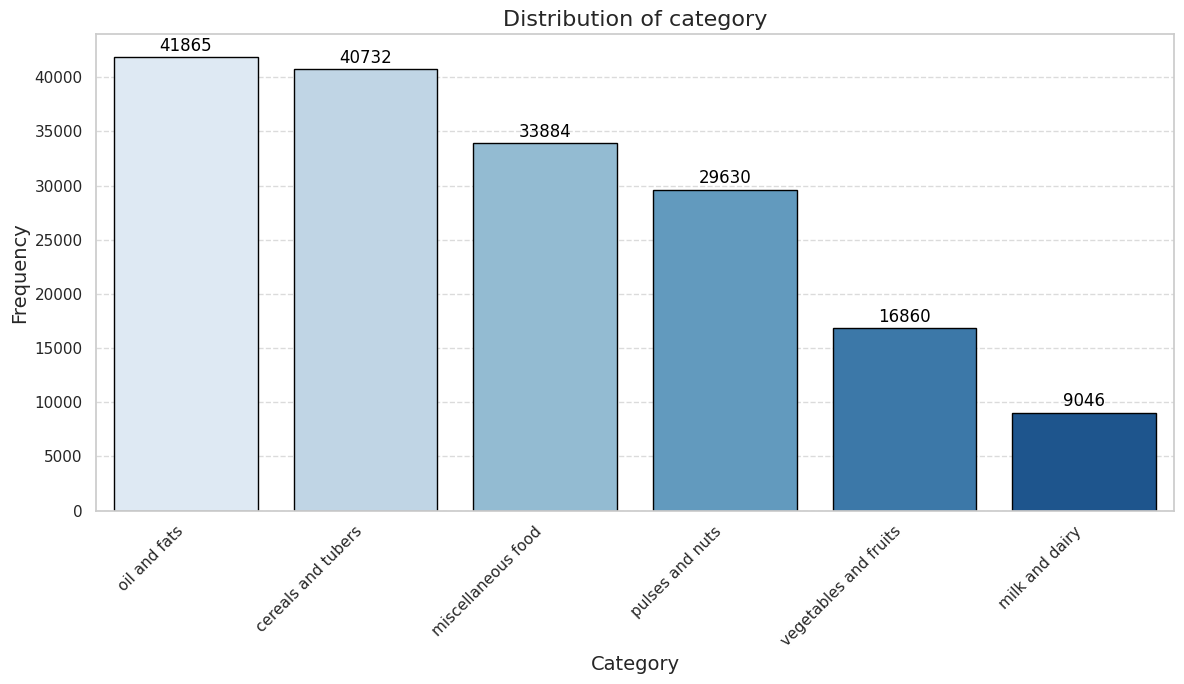

In [22]:
# Mengatur gaya visual
sns.set(style="whitegrid")

# Daftar kolom kategorikal yang ingin dianalisis
categorical_columns = ['category']

# Membuat plot untuk setiap kolom kategorikal
for col in categorical_columns:
    plt.figure(figsize=(12, 7))  # Mengatur ukuran plot

    # Menghitung nilai frekuensi untuk menentukan warna
    value_counts = df[col].value_counts()

    # Membuat palette warna dari biru muda ke biru tua
    colors = sns.color_palette("Blues", len(value_counts))

    # Membuat countplot dengan warna yang sesuai
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, edgecolor="black")

    # Menambahkan judul dan label
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col.capitalize(), fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Menambahkan anotasi frekuensi di atas setiap bar dan memberikan jarak agar tidak tertutup
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height() + 200),  # Menambahkan jarak 200 agar tidak tertutup
                    ha='center', va='bottom', fontsize=12, color='black')

    # Memutar label sumbu x untuk keterbacaan lebih baik
    plt.xticks(rotation=45, ha='right')

    # Menampilkan grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Menampilkan plot
    plt.tight_layout()  # Mengatur tata letak agar label tidak terpotong
    plt.show()

Visualisasi dalam bentuk diagram batang (barplot) yang menampilkan distribusi frekuensi dari berbagai kategori komoditas.
Kategori dengan frekuensi tertinggi adalah "oil and fats" dengan 41,865 produk, diikuti kategori "cereals and tubers" dengan 40,732 produk, dan "miscellaneous food" dengan 33,884 produk. Sementara kategori dengan frekuensi terendah adalah "milk and dairy" dengan 9,046 produk.
Visualisasi ini menggunakan gaya "whitegrid" dengan gradasi warna biru dari muda ke tua untuk menampilkan distribusi frekuensi kategori. Selain itu, label kategori dirotasi 45 derajat untuk meningkatkan keterbacaan dan nilai frekuensi ditampilkan di atas setiap batang dengan jarak 200 unit, sehingga memberikan informasi yang jelas dan mudah dipahami.

<ipython-input-24-8970c999d165>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, edgecolor="black")


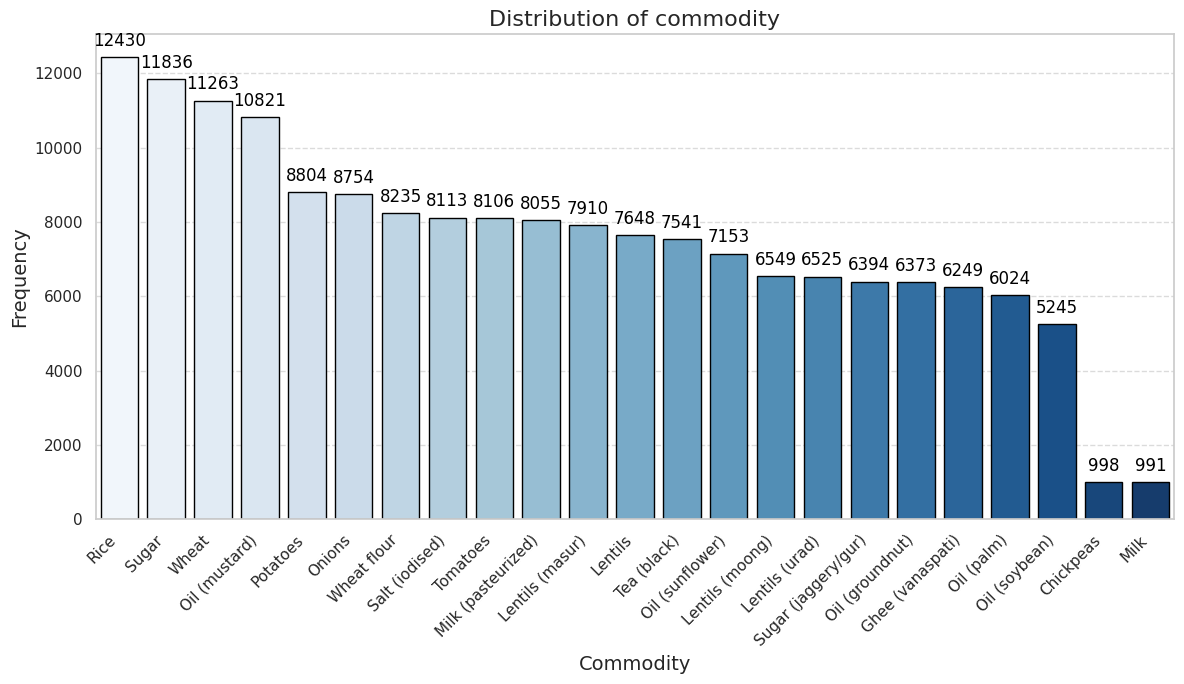

In [24]:
# Mengatur gaya visual
sns.set(style="whitegrid")

# Daftar kolom kategorikal yang ingin dianalisis
categorical_columns = ['commodity']

# Membuat plot untuk setiap kolom kategorikal
for col in categorical_columns:
    plt.figure(figsize=(12, 7))  # Mengatur ukuran plot

    # Menghitung nilai frekuensi untuk menentukan warna
    value_counts = df[col].value_counts()

    # Membuat palette warna dari biru muda ke biru tua
    colors = sns.color_palette("Blues", len(value_counts))

    # Membuat countplot dengan warna yang sesuai
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, edgecolor="black")

    # Menambahkan judul dan label
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col.capitalize(), fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Menambahkan anotasi frekuensi di atas setiap bar dan memberikan jarak agar tidak tertutup
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}',
                    (p.get_x() + p.get_width() / 2., p.get_height() + 200),  # Menambahkan jarak 200 agar tidak tertutup
                    ha='center', va='bottom', fontsize=12, color='black')

    # Memutar label sumbu x untuk keterbacaan lebih baik
    plt.xticks(rotation=45, ha='right')

    # Menampilkan grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Menampilkan plot
    plt.tight_layout()  # Mengatur tata letak agar label tidak terpotong
    plt.show()

Dari visualisasi ini, dapat dilihat bahwa komoditas dengan frekuensi tertinggi adalah Ride dengan 12,430 produk, diikuti oleh Sugar dengan 11,836 produk, serta Wheat dan Oil (miscellaneous) masing-masing dengan 11,263 dan 10,821 produk. Terdapat pula beberapa komoditas dengan frekuensi menengah, seperti Potatoes, Onions, dan Wheat flour yang berada di kisaran 7,000-9,000 produk, serta komoditas dengan frekuensi lebih rendah antara 6,000-7,000 produk, seperti Laser Tag, Museum, dan Cave. Komoditas dengan frekuensi terendah adalah Classroom dan Wall, masing-masing hanya 998 dan 991 produk.

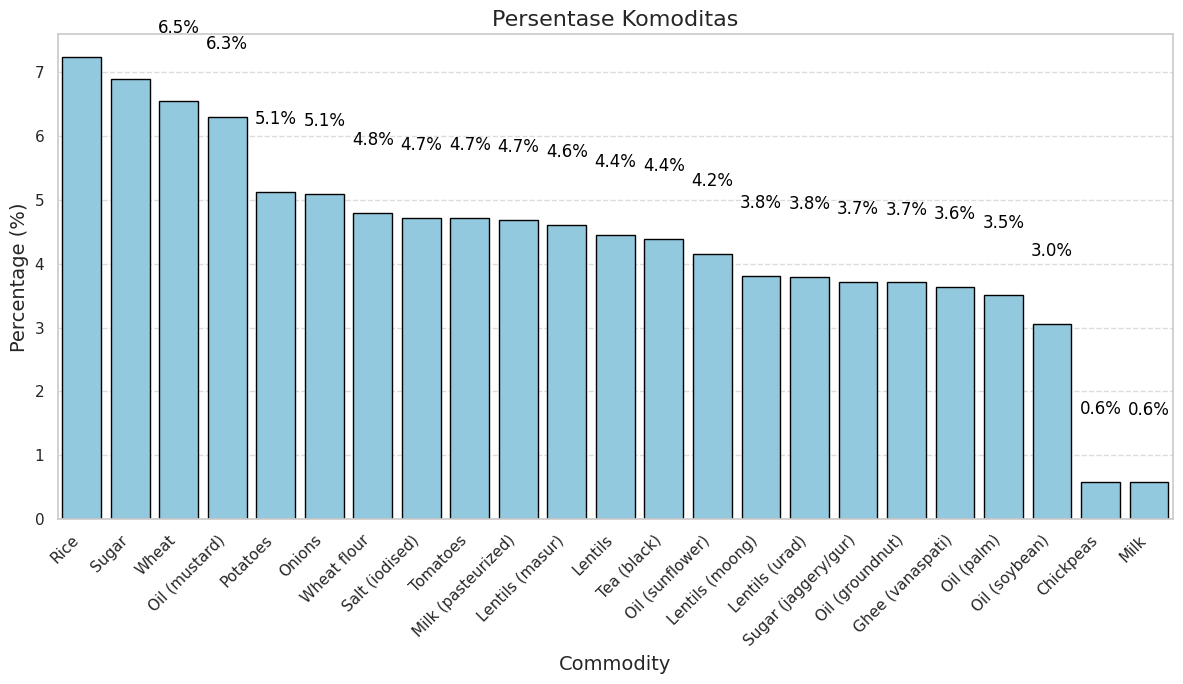

In [36]:
# Mengatur gaya visual
sns.set(style="whitegrid")

# Menghitung persentase komoditas
commodity_counts = df['commodity'].value_counts(normalize=True) * 100

# Membuat plot untuk distribusi persentase komoditas
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=commodity_counts.index, y=commodity_counts.values, color="skyblue", edgecolor="black")

# Menambahkan judul dan label
plt.title("Persentase Komoditas", fontsize=16)
plt.xlabel("Commodity", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)

# Menambahkan anotasi persentase di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height() + 1),  # Menambahkan jarak 1 agar tidak tertutup
                ha='center', va='bottom', fontsize=12, color='black')

# Memutar label sumbu x untuk keterbacaan lebih baik
plt.xticks(rotation=45, ha='right')

# Menampilkan grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()  # Mengatur tata letak agar label tidak terpotong
plt.show()

Komoditas dengan persentase tertinggi adalah Rice dengan 7,3%, diikuti oleh Sugar sebesar  dan Wheat. Beberapa komoditas lain memiliki persentase yang cukup tinggi, seperti Oil (mustard), Potatoes, dan Onions. Sementara itu, komoditas dengan persentase yang relatif rendah antara lain Chikpeas, Oil (soybean), dan Milk.

Korelasi antara price dan usdprice: 0.94


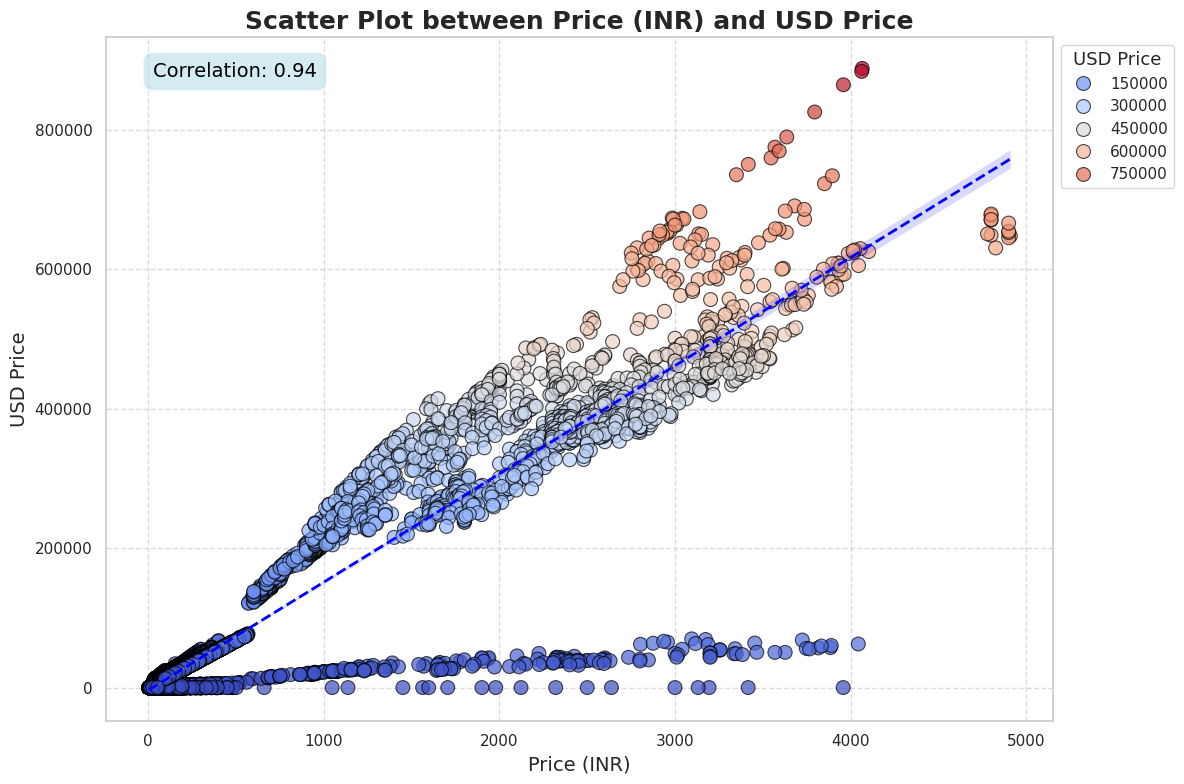

In [25]:
# Menghitung korelasi antara 'price' dan 'usdprice'
correlation = df['price'].corr(df['usdprice'])
print(f"Korelasi antara price dan usdprice: {correlation:.2f}")

# Visualisasi korelasi dengan scatter plot yang lebih menarik
plt.figure(figsize=(12, 8))

# Menggunakan scatterplot dengan warna berdasarkan harga USD, semakin tinggi harga semakin gelap
sns.scatterplot(data=df, x='price', y='usdprice', hue='usdprice', palette="coolwarm", alpha=0.7, s=100, edgecolor='black')

# Menambahkan garis regresi
sns.regplot(data=df, x='price', y='usdprice', scatter=False, color="blue", line_kws={"linewidth": 2, "linestyle": "dashed"})

# Menambahkan judul dan label
plt.title('Scatter Plot between Price (INR) and USD Price', fontsize=18, fontweight='bold')
plt.xlabel('Price (INR)', fontsize=14)
plt.ylabel('USD Price', fontsize=14)

# Menambahkan anotasi korelasi di sudut kanan atas plot
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', ha='left', va='center', transform=plt.gca().transAxes,
         fontsize=14, color='black', bbox=dict(facecolor='lightblue', alpha=0.5, boxstyle='round,pad=0.5'))

# Menampilkan legenda
plt.legend(title='USD Price', loc='upper left', bbox_to_anchor=(1, 1), title_fontsize='13')

# Menampilkan grid
plt.grid(True, linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()

Dari scatter plot tersebut, dapat dilihat bahwa terdapat korelasi yang kuat antara price dan usdprice, dengan nilai korelasi sebesar 0.94. Hal ini berarti semakin tinggi harga dalam Rupee, semakin tinggi pula harga dalam USD. Scatter plot juga menunjukkan bahwa sebagian besar data terkumpul di sekitar garis regresi biru yang digambarkan, mengindikasikan adanya hubungan linear yang kuat antara kedua variabel tersebut.
Selain itu, scatter plot ini juga menampilkan informasi tambahan dengan menggunakan warna yang menunjukkan kisaran harga dalam USD. Semakin terang warna titik, semakin tinggi harga dalam USD. Hal ini membantu memperjelas pola hubungan antara price dan usdprice. Visualisasi ini dilengkapi dengan grid dan legenda yang memudahkan interpretasi plot.

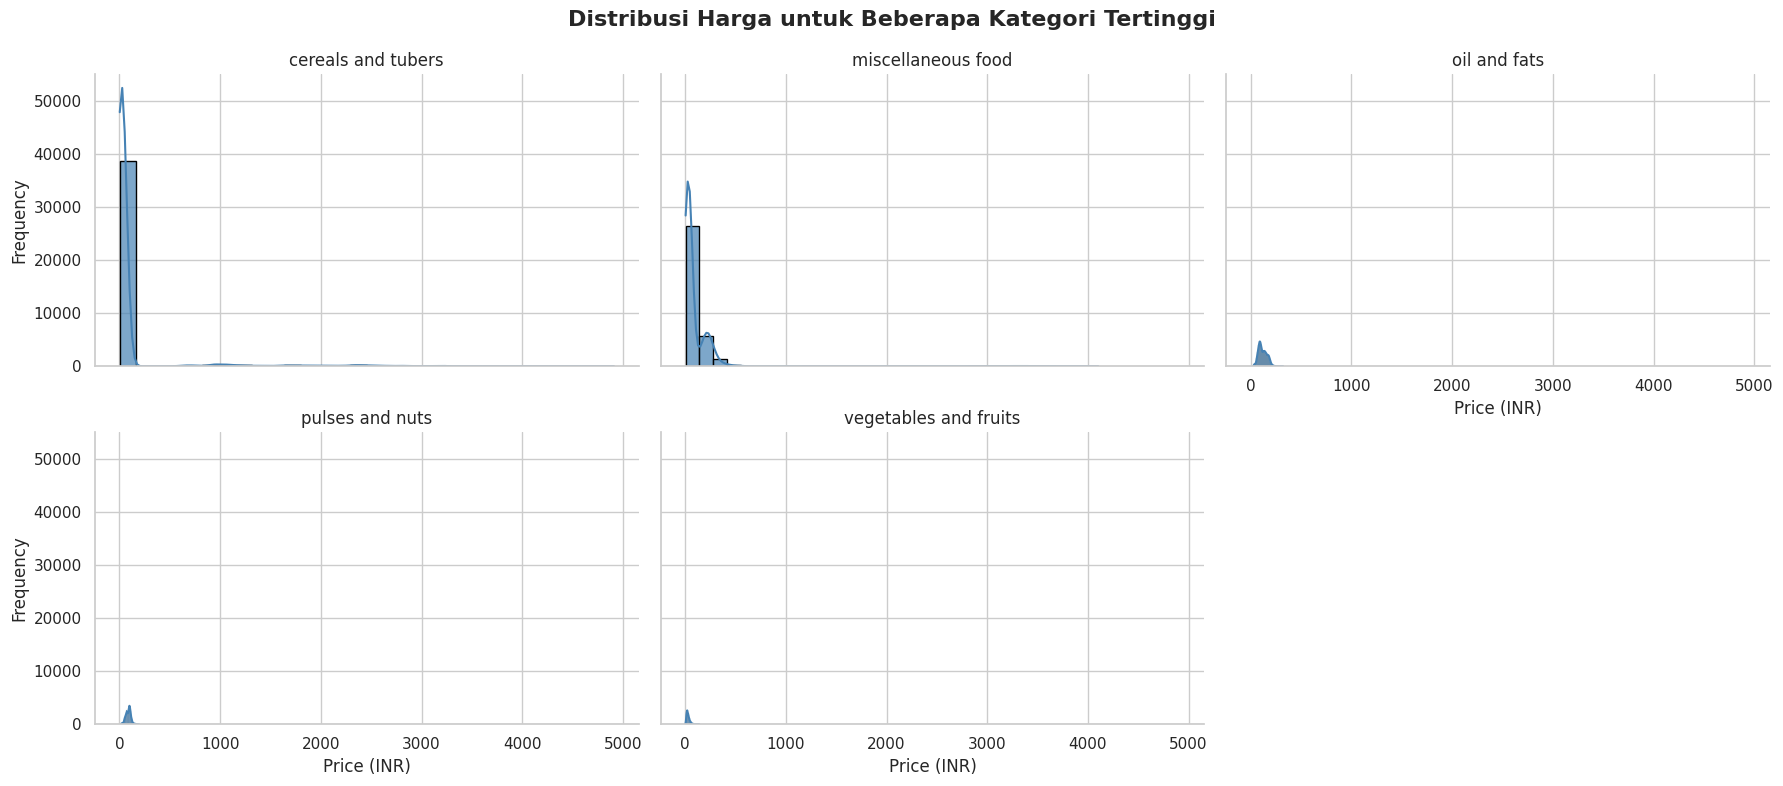

In [26]:
# Ambil beberapa kategori yang paling sering muncul
top_categories = df['category'].value_counts().nlargest(5).index
df_top_categories = df[df['category'].isin(top_categories)]

# Membuat grid dengan warna berbeda untuk setiap kategori
g = sns.FacetGrid(df_top_categories, col='category', col_wrap=3, height=4, aspect=1.5, sharey=True, palette="viridis")

# Menggunakan histogram dengan KDE dan warna palet berbeda
g.map(sns.histplot, 'price', kde=True, bins=30, color='steelblue', edgecolor='black', alpha=0.7)

# Mengatur label sumbu
g.set_axis_labels("Price (INR)", "Frequency")

# Mengatur judul untuk setiap kategori
g.set_titles("{col_name}")

# Menambahkan judul utama dengan gaya dan posisi yang optimal
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribusi Harga untuk Beberapa Kategori Tertinggi', fontsize=16, fontweight='bold')

# Menampilkan plot
plt.show()

Grafik di atas menampilkan distribusi harga untuk lima kategori produk teratas (cereals and tubers, miscellaneous food, oil and fats, pulses and nuts, serta vegetables and fruits). Setiap kategori memiliki histogram sendiri yang menunjukkan frekuensi harga produk dalam rentang tertentu. Garis lengkung pada histogram mewakili estimasi kepadatan probabilitas (KDE) yang memberikan gambaran lebih halus tentang distribusi data.

Secara umum, dapat dilihat bahwa sebagian besar produk dalam setiap kategori memiliki harga yang relatif rendah, dengan beberapa produk memiliki harga yang jauh lebih tinggi. Hal ini ditunjukkan oleh bentuk histogram yang cenderung condong ke kiri. Kategori "miscellaneous food" memiliki distribusi harga yang paling menyebar, sementara kategori "oil and fats" memiliki distribusi yang paling terkonsentrasi pada harga rendah.

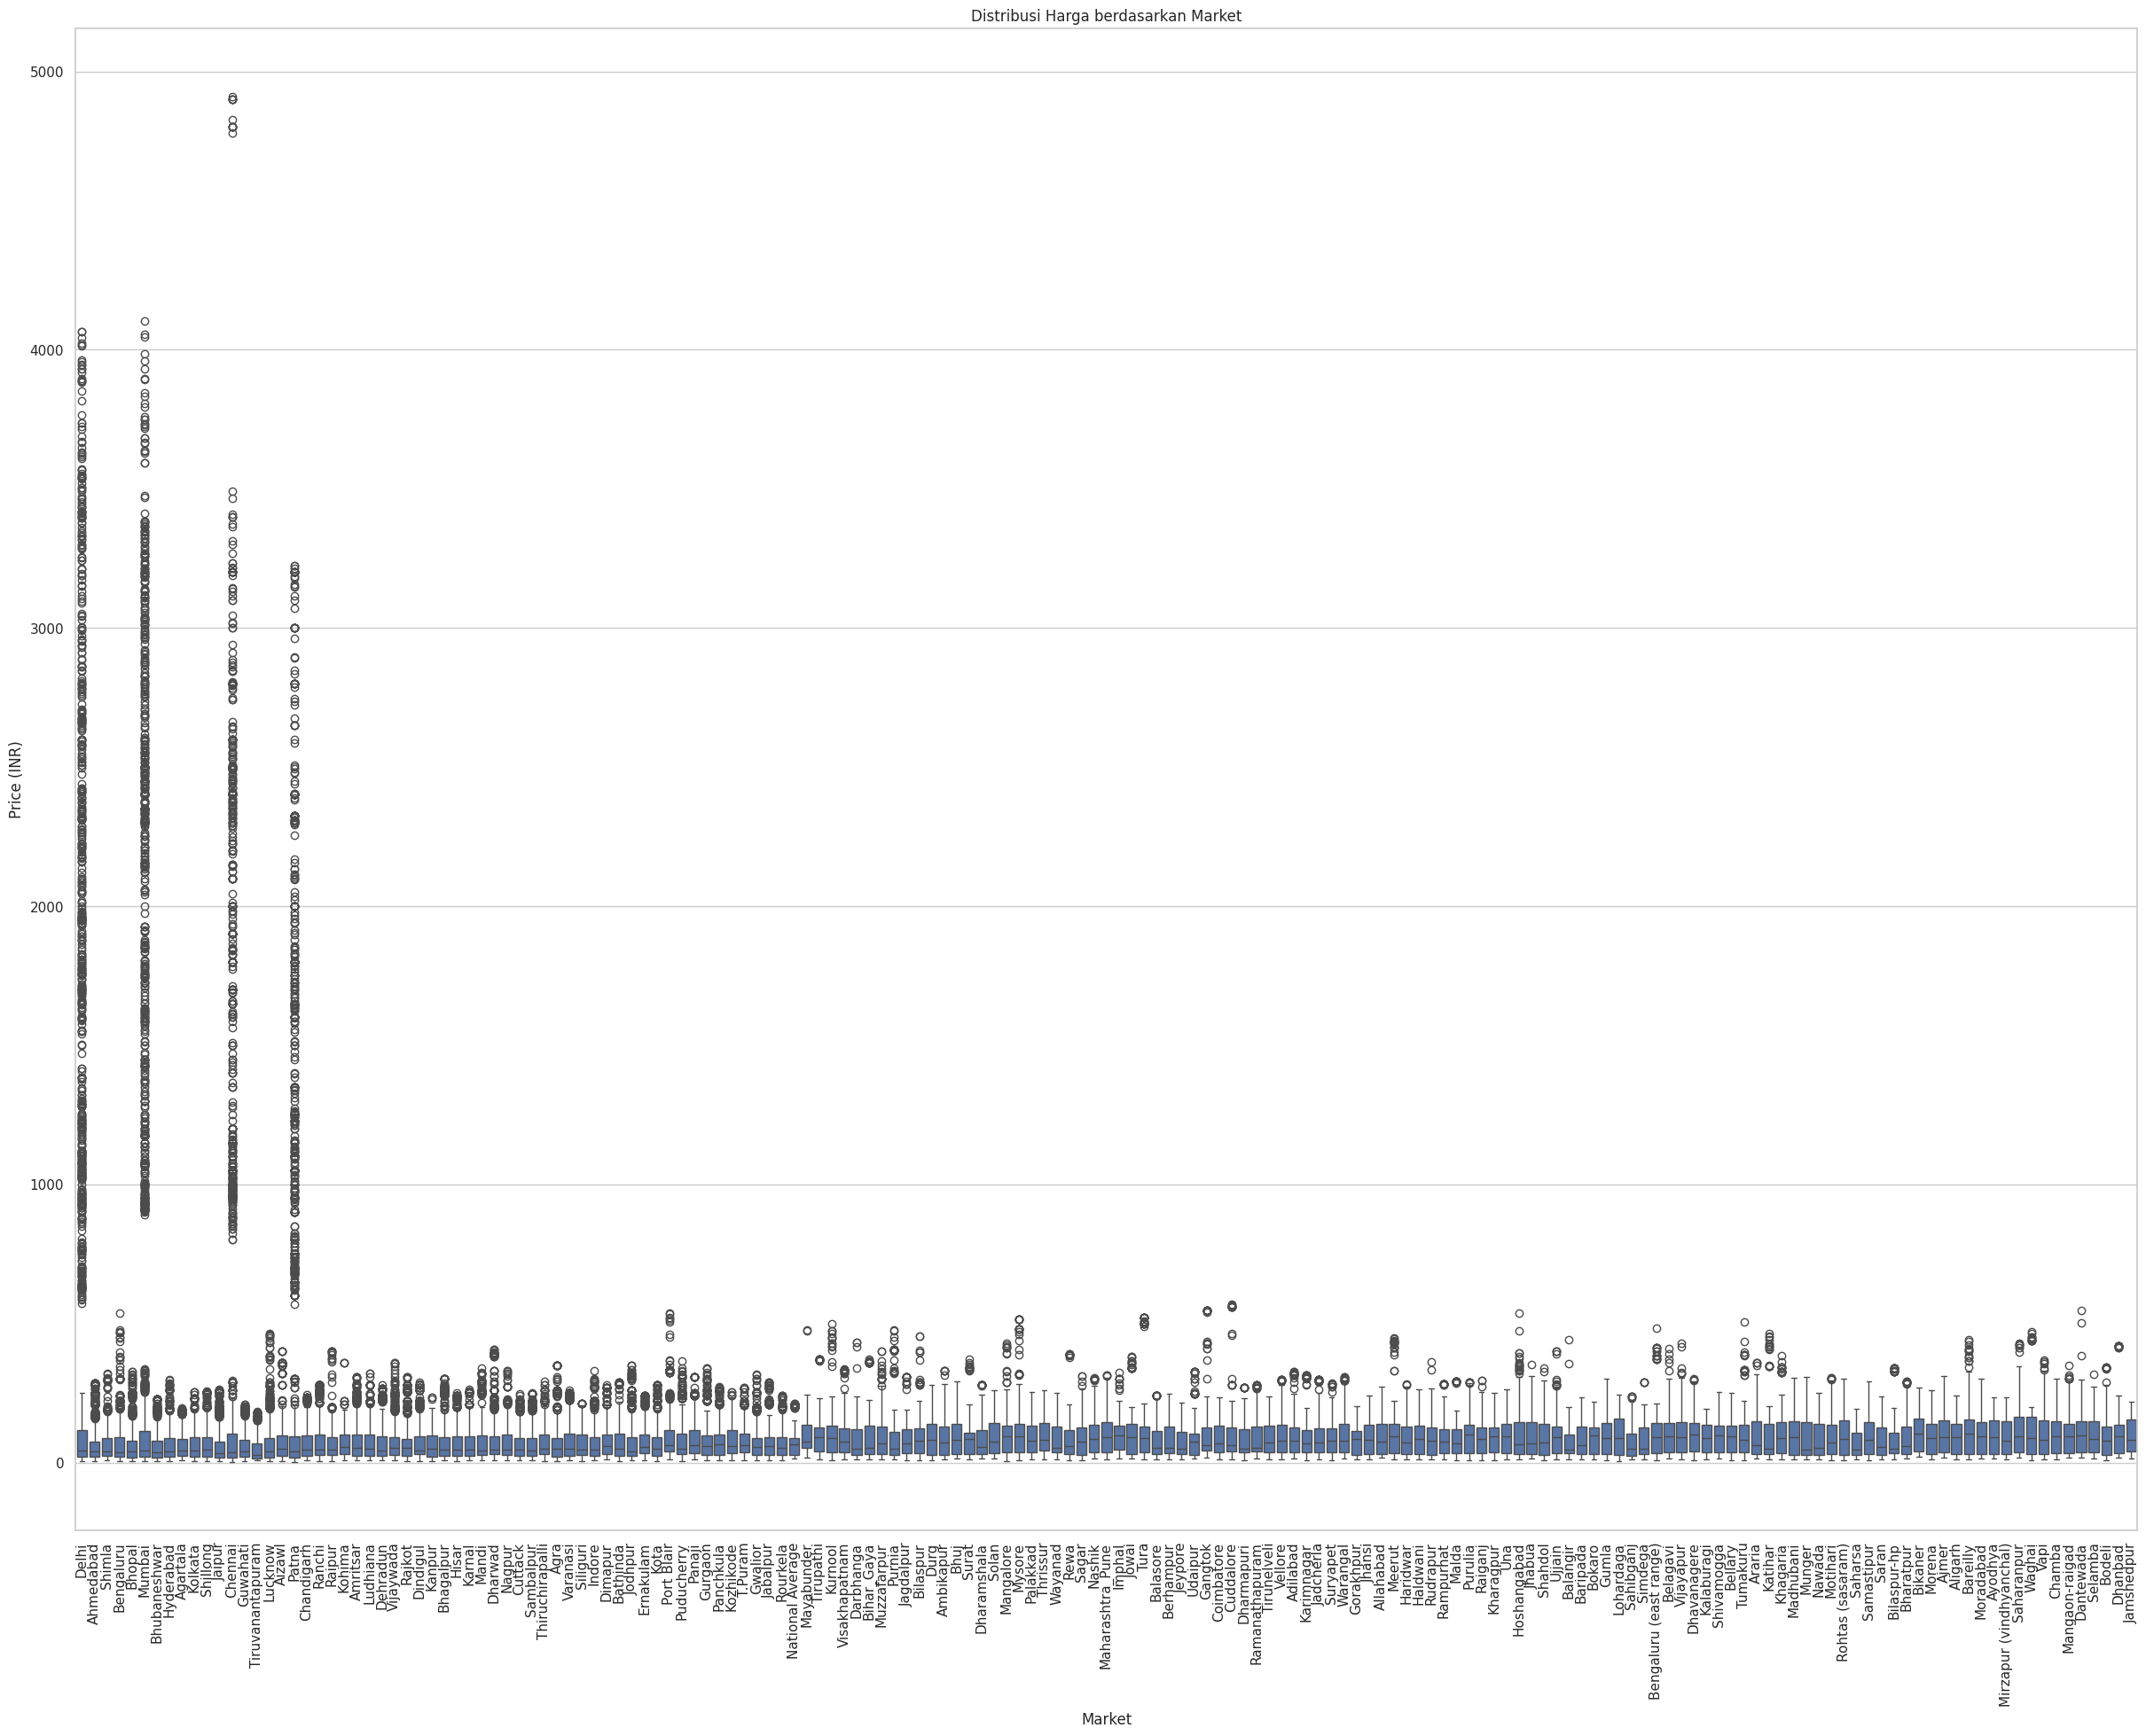

In [33]:
# Mengambil sampel data
df_sample = df.sample(n=100000, random_state=42)

plt.figure(figsize=(30, 22))
sns.boxplot(data=df, x='market', y='price')
plt.title('Distribusi Harga berdasarkan Market')
plt.xlabel('Market')
plt.ylabel('Price (INR)')
plt.xticks(rotation=90)  # Memiringkan label pasar agar mudah dibaca
plt.show()

Analisis terhadap distribusi harga produk berdasarkan pasar menunjukkan adanya variasi harga yang signifikan antar pasar. Beberapa pasar memiliki harga rata-rata yang jauh lebih tinggi dibandingkan pasar lainnya. Adanya outlier atau nilai ekstrem pada beberapa pasar mengindikasikan adanya produk-produk tertentu dengan harga yang jauh di atas atau di bawah rata-rata pasar. Selain itu, bentuk distribusi harga pada setiap pasar juga bervariasi, dengan beberapa pasar memiliki distribusi yang lebih condong ke kanan (positif skew). Hasil analisis ini menunjukkan bahwa faktor pasar memiliki pengaruh yang kuat terhadap harga produk.

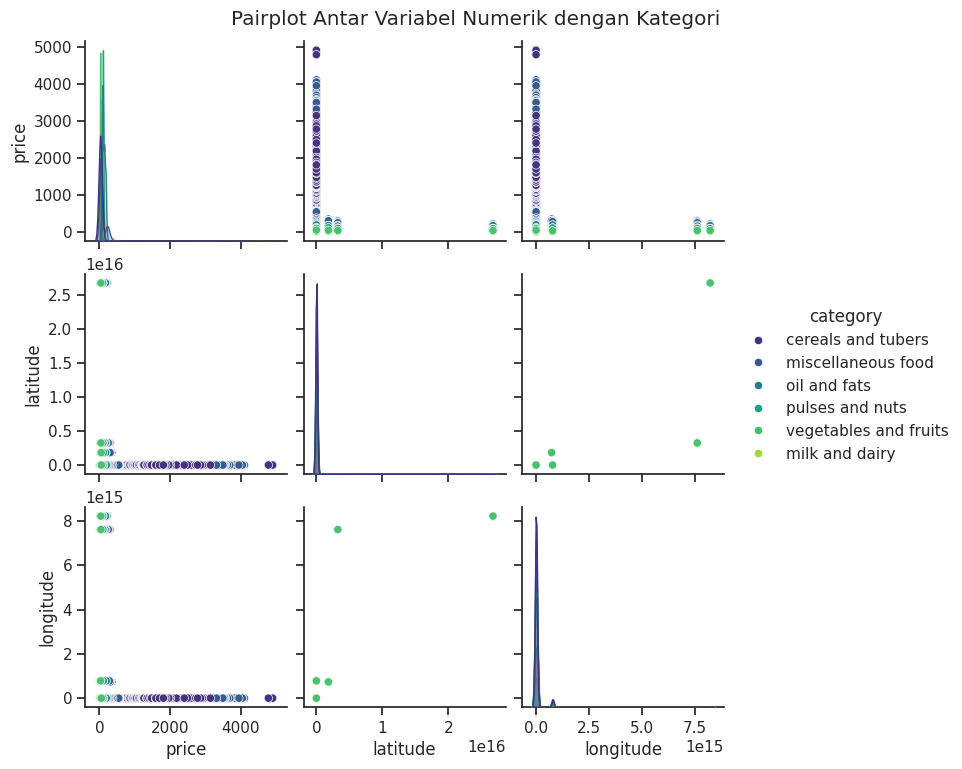

In [40]:
# Set style untuk visualisasi
sns.set(style="ticks", color_codes=True)

# Membuat pairplot untuk melihat hubungan antara price, latitude, dan longitude
sns.pairplot(df, vars=['price', 'latitude', 'longitude'], hue='category', palette='viridis')

plt.suptitle('Pairplot Antar Variabel Numerik dengan Kategori', y=1.02)
plt.show()

Secara spesifik, kode ini menghasilkan sebuah pairplot yang menampilkan hubungan antar variabel numerik dalam dataset, yaitu harga, lintang, dan bujur. Variabel kategorik "kategori" digunakan untuk mewarnai titik-titik data sehingga kita dapat melihat bagaimana setiap kategori mempengaruhi distribusi variabel numerik lainnya.

Output dari kode tersebut adalah sebuah plot matriks yang menampilkan hubungan antar variabel. Setiap kotak pada plot mewakili hubungan antara dua variabel. Diagonal utama berisi histogram untuk masing-masing variabel, menunjukkan distribusi frekuensi data. Plot di luar diagonal menunjukkan scatter plot antara dua variabel. Warna yang berbeda pada titik-titik data mewakili kategori produk yang berbeda. Dari plot ini, kita dapat melihat distribusi harga, lintang, dan bujur untuk setiap kategori, serta hubungan antara variabel-variabel tersebut.

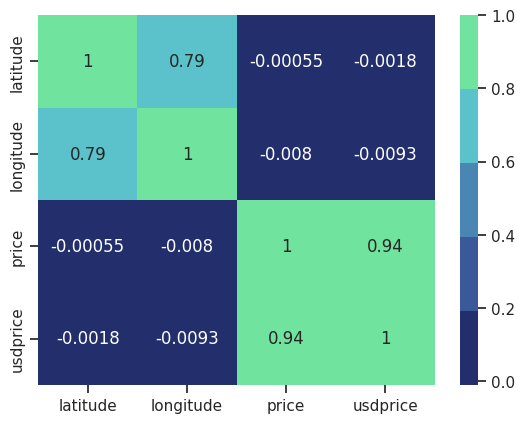

In [61]:
# Pilih kolom numerik yang ingin dikorelasikan
numeric_cols = ['latitude', 'longitude', 'price', 'usdprice']

# Hitung matriks korelasi
corr_matrix = df[numeric_cols].corr()

# Visualisasi heatmap
color_hex = ['#222F6C', '#3B5998', '#4A86B4', '#5BC2CC', '#70E49F']
cmap = ListedColormap(color_hex)
sns.heatmap(corr_matrix, annot=True, cmap=cmap)
plt.show()

Output yang dihasilkan adalah sebuah heatmap yang menampilkan matriks korelasi. Pada heatmap ini, setiap kotak mewakili korelasi antara dua variabel. Nilai numerik pada setiap kotak menunjukkan koefisien korelasi, yang berkisar antara -1 hingga 1. Nilai 1 menunjukkan korelasi positif sempurna, -1 menunjukkan korelasi negatif sempurna, dan 0 menunjukkan tidak ada korelasi. Dari heatmap ini, kita dapat melihat bahwa variabel 'price' dan 'usdprice' memiliki korelasi yang sangat kuat (hampir 1), yang menunjukkan bahwa kedua variabel ini sangat terkait. Selain itu, variabel 'latitude' dan 'longitude' juga memiliki korelasi yang cukup kuat (sekitar 0.79), yang mungkin mengindikasikan adanya hubungan geografis antara data.